<a href="https://colab.research.google.com/github/PrikhodkoMA/Math_prac/blob/Hometask_5/MP_hometask_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import time
     

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
# setting the seed
rng.current = 1


def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
# setting the seed
rng_bad.current = 1

samples = [rng() for _ in range(1000)]

### Задача 1 
Реализовать serial test и применить к выборке samples

In [ ]:
def serial_test(n, samples):
    f_obs = np.histogram2d(samples[::2], samples[1::2], bins=[n, n])
    f_exp = np.full(n*n, len(samples)//(2*n*n))

    print(f_obs[0]) 
    print(f_exp) 
    print(stats.chisquare(f_obs[0].reshape(n**2,), f_exp))
    
serial_test(10, samples)

[[ 6. 12.  6.  2.  3.  4.  4.  7.  4.  3.]
 [ 6.  4.  4.  3.  9.  7.  5.  4.  4.  4.]
 [ 5.  6.  5.  8.  5.  6.  2.  5.  3.  4.]
 [ 2.  5.  4.  1.  8.  6.  5.  7.  5. 12.]
 [ 7.  4.  4.  5.  3.  2.  4.  6.  3.  0.]
 [ 3.  6.  0.  4.  5.  6.  4.  6.  6.  6.]
 [ 2.  6.  3.  3.  6.  6.  3.  3.  8.  1.]
 [ 2.  7.  9.  7.  8.  6.  5.  4.  8.  1.]
 [ 7.  5.  2.  6.  4.  5.  6.  9.  6.  6.]
 [ 3.  7.  7.  5.  7.  7.  3.  3.  7.  8.]]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Power_divergenceResult(statistic=100.39999999999999, pvalue=0.4418131550464517)


### Задача 2
Реализовать permutation test и применить к выборке samples

In [ ]:
n = 1000
d = 200
k = n // d 
def permutation_test(n, samples):
  new_samples = np.zeros(n)
  for i in range(0, n -1):
      if samples[i] > samples[i + 1]: 
          new_samples[i] = 1
      if samples[i] < samples[i + 1]: 
          new_samples[i] = -1
      if i % (n//d) == 0:
          new_samples[i] = 0

  new_samples_splt = np.split(new_samples, d)
  f_obs = np.unique(new_samples_splt, return_counts = True, axis = 0)[1]
  f_exp = np.full(len(f_obs), n // np.math.factorial(k))
  print(f_obs) 
  print(f_exp) 
  print(stats.chisquare(f_obs, (np.sum(f_obs) / np.sum(f_exp)) * f_exp))

permutation_test(n, samples)

[ 2  5 10  7 13  1 28 20  5 10 16 29 17 10 20  7]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
Power_divergenceResult(statistic=87.36, pvalue=3.0744962418968827e-12)


###Задача 3 
Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [ ]:
random = [rng_bad() for _ in range(30000)] 
samples = [rng() for _ in range(30000)] 
print(stats.kstest(samples, stats.uniform.cdf))
print(stats.kstest(random, stats.uniform.cdf))

KstestResult(statistic=0.005135696888094121, pvalue=0.4059949966571025)
KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)


Если pvalue <= 0.05, то отвергаем гипотезу, что выборка имеет заданное (здесь равномерное) распределение.
Здесь rng_bad не подходит под равномерное рапределение, а rng подходит

### Задача 4


Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

*Не оптимизировалось после упорядочивания*

--- 0.011730670928955078 seconds without order ---


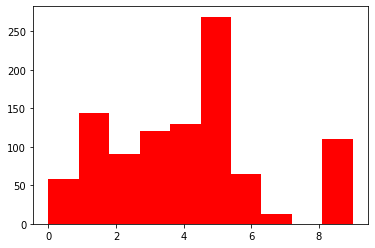

--- 0.015646696090698242 seconds with order ---


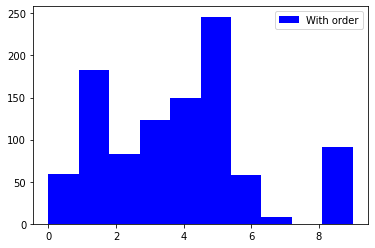

In [ ]:
import time

def step(weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])):
    new_weight = np.zeros(11)
    for i in range(1, 11):
      new_weight[i] = new_weight[i - 1] + weight[i - 1]
    c = np.random.rand() * weight.sum() 
    for i in range (10): 
        if(new_weight[i] <= c < new_weight[i + 1]):
          return i

def step_ord(weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])):
    a = np.sort(weight)
    b = np.argsort(weight)
    new_weight = np.zeros(11)
    for i in range(1, 11):
      new_weight[i] = new_weight[i - 1] + a[i - 1]
    c = np.random.rand() * weight.sum() 
    for i in range (10): 
        if(new_weight[i]<= c < new_weight[i + 1]):
          return b[i]
start = time.time()
random = [step() for i in range(1000)]
end = time.time()
start_ord = time.time()
random_ord = [step_ord() for i in range(1000)]
end_ord = time.time()

end_ord - start_ord
print("--- %s seconds without order ---" % (end - start))
plt.hist(random, color = "red", label="Without order")
plt.show()
print("--- %s seconds with order ---" % (end_ord - start_ord))
plt.hist(random_ord, color = "blue", label="With order")
plt.legend()
plt.show()

### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

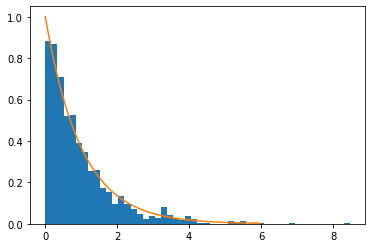

In [ ]:
import math

def inverse(l):
  a = np.random.rand()
  return ((-math.log(1 - a))/l)

random = [inverse(1) for i in range(1000)]
plt.hist(random, bins = 50, density = True)
x = np.arange(0, 6, 0.01)
plt.plot(x, np.exp(-1 * x))
plt.show()


### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

In [ ]:
%matplotlib inline

x = np.linspace(-np.pi/2, np.pi/2, 1000)
density = np.exp(x)*np.cos(x)**2 

md = 1/(max(density)*np.pi)
print(max(density))
print(md)

1.271890030413913
0.25026525766555674


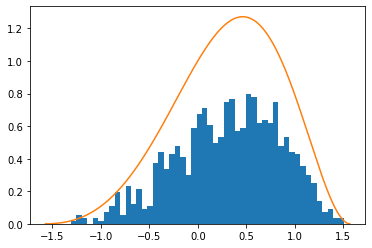

In [ ]:
def acc_rej():
    point = [0,0]
    point[0] = (np.random.rand() - 0.5)*np.pi
    point[1] = np.random.rand()
    while point[1] > np.exp(point[0])* md *np.cos(point[0])**2:
      point[0] = (np.random.rand() - 0.5) * np.pi
      point[1] =  np.random.rand()
    return point
random = [acc_rej() for i in range(1000)]
randomx = [random[i][0] for i in range(1000)]
randomy = [random[i][1] for i in range(1000)]
plt.hist(randomx , bins = 50, density = True)
X = np.arange(-np.pi/2, np.pi/2, np.pi / 1000)
plt.plot(X, np.exp(X) * np.cos(X)**2)
plt.show()

### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

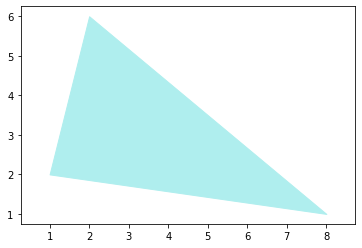

In [ ]:
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
p = PatchCollection([polygon])
p.set_color('paleturquoise')
plt.gca().add_collection(p)
plt.axis('equal')
plt.show()

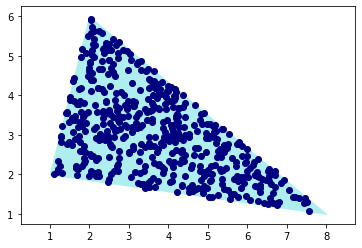

In [ ]:
x = np.array([np.random.rand() for i in range(500)])
y = np.array([np.random.rand() for i in range(500)])
x[(x + y) > 1] = 1 - x[(x + y) > 1]
y[(x + y) > 1] = 1 - y[(x + y) > 1]
x_= np.array([np.random.rand() for i in range(500)])
x_ =  (7 * x + 1 * y + 1)
y  =  (-1 * x + 4 * y +  2)
polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
p = PatchCollection([polygon])
p.set_color('paleturquoise')
plt.gca().add_collection(p)
plt.axis('equal')
plt.scatter(x_, y, color = 'navy')
plt.show()

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

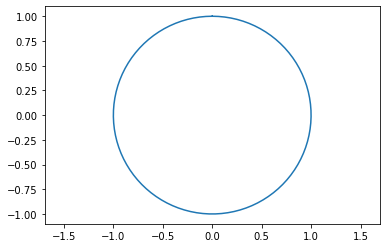

In [ ]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

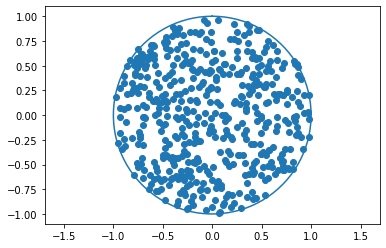

In [ ]:
r = np.array([np.random.rand() for i in range(500)])
ang = np.array([2*np.pi *np.random.rand() for i in range(500)])
x = np.sqrt(r)*np.cos(ang)
y = np.sqrt(r)*np.sin(ang)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(x,y)
plt.show() 

### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

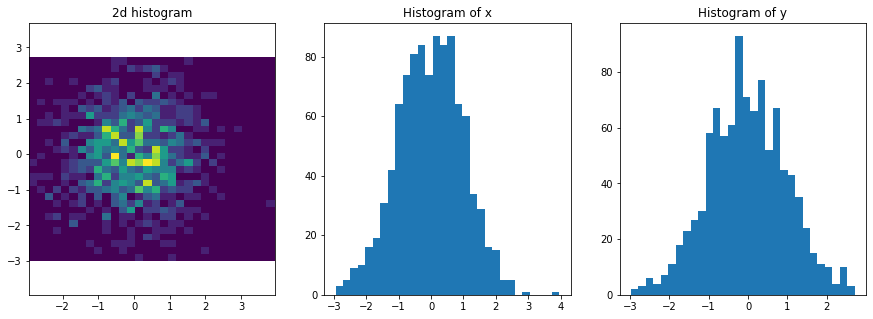

In [ ]:
%matplotlib inline

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()